<a href="https://colab.research.google.com/github/diptaban/DecisionTree/blob/main/DecisionTree_Simple_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4
4.5


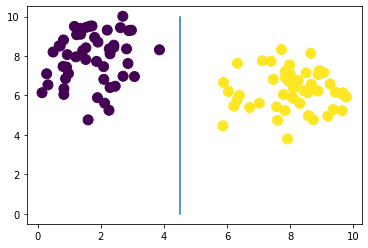

In [20]:
import numpy as np
from numpy import *
def H(p,n):
  h = 0
  
  if (p!=0 & n != 0):
    p1 = p/(p+n)
    n1= n/(p+n)
    h = -(p1*np.log2(p1) + n1*np.log2(n1))
  elif (p== 0 & n != 0):
    n1= n/(p+n)
    h = - n1*np.log2(n1)
  elif (p!= 0 & n == 0):
    p1 = p/(p+n)
    h = -p1*np.log2(p1)
  return h
  
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100, centers=2, n_features=2,\
random_state=20)
#X = np.array([[1,1],[2,1.5],[3,1],[4,0.7]])
#Y= np.array([1,1,0,0])
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y,s=100)
total = 4
p=2
n=2

E_root = H(2,2)
#print(E_root)
P_X = np.squeeze(X[np.where(Y==1),:])
N_X = np.squeeze(X[np.where(Y==0),:])

#print(P_X)
LP = P_X.shape[0]
LN = N_X.shape[0]
#print(LP)

IG_List =[]
thr =[]
for i in range(10):


  x1 = i+0.5
  pos_g = 0
  neg_g = 0
  pos_l = 0
  neg_l = 0
  for i in range (P_X.shape[0]):
    if ((P_X[i,0]>x1)):
      pos_g +=1
  for i in range(N_X.shape[0]):
    if ((N_X[i,0]>x1)):
      neg_g+=1 

  for i in range (P_X.shape[0]):
    if ((P_X[i,0]<x1)):
      pos_l +=1
  for i in range(N_X.shape[0]):
    if ((N_X[i,0]<x1)):
      neg_l+=1 

  #print(pos_g,neg_g)
  #print(pos_l,neg_l)

  PplusN = pos_g+neg_g+pos_l+neg_l


  IG = E_root - ( (pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
  #print(IG)
  IG_List.append(IG)
  thr.append(x1)

index = IG_List.index(max(IG_List))
print(index)
print(thr[index])

y = np.linspace(0,10,20)
x = thr[index] * np.ones(20)
plt.plot(x,y)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


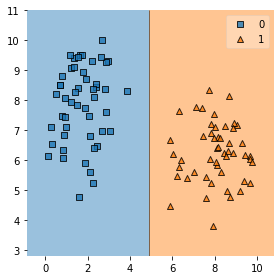

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
y =  np.expand_dims(y, axis=1)
dt_entropy.fit(X, Y)


from mlxtend.plotting import plot_decision_regions
 

 
fig, ax = plt.subplots(figsize=(4, 4))
plot_decision_regions(X, Y, clf=dt_entropy)

plt.tight_layout()
plt.show()
